## 1. The Statcast revolution
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_250/img/judge_wide.jpg"></p>
<p>This is Aaron Judge. Judge is one of the physically largest players in Major League Baseball standing 6 feet 7 inches (2.01 m) tall and weighing 282 pounds (128 kg). He also hit the <a href="https://www.mlb.com/news/aaron-judge-sets-statcast-exit-velocity-record/c-235640846">hardest home run</a> ever recorded. How do we know this? <strong>Statcast</strong>.</p>
<p>Statcast is a state-of-the-art tracking system that uses high-resolution cameras and radar equipment to measure the precise location and movement of baseballs and baseball players. Introduced in 2015 to all 30 major league ballparks, Statcast data is revolutionizing the game. Teams are engaging in an "arms race" of data analysis, hiring analysts left and right in an attempt to gain an edge over their competition. This <a href="https://www.youtube.com/watch?v=9rOKGKhQe8U">video</a> describing the system is incredible.</p>
<p><strong>In this notebook</strong>, we're going to wrangle, analyze, and visualize Statcast data to compare Mr. Judge and another (extremely large) teammate of his. Let's start by loading the data into our Notebook. There are two CSV files, <code>judge.csv</code> and <code>stanton.csv</code>, both of which contain Statcast data for 2015-2017. We'll use pandas DataFrames to store this data. Let's also load our data visualization libraries, matplotlib and seaborn.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
!pwd

/c/Users/602770/downloads/datacamp-projects/Python/A New Era of Data Analysis in Baseball - Python


In [3]:
# Load Aaron Judge's Statcast data
judge = pd.read_csv('datasets/judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('datasets/stanton.csv')

In [5]:
judge.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,FF,2017-09-30,95.7,-2.3581,5.9240,Aaron Judge,592450,608678,strikeout,swinging_strike,...,54.0129,0.0,0.0,0.0,1.0,0.0,0.0,NaN,53,3
1,FF,2017-09-30,96.3,-2.5577,5.9023,Aaron Judge,592450,608678,NaN,called_strike,...,54.1114,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,2
2,FF,2017-09-30,95.2,-2.3861,5.8346,Aaron Judge,592450,608678,NaN,called_strike,...,54.0285,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,1
3,FT,2017-09-30,93.4,4.2502,4.6506,Aaron Judge,592450,571901,walk,ball,...,54.7309,0.0,0.0,0.7,1.0,0.0,0.0,NaN,36,5
4,FT,2017-09-30,92.8,4.1144,4.4696,Aaron Judge,592450,571901,NaN,called_strike,...,54.5228,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36,4


In [12]:
judge.

RangeIndex(start=0, stop=3436, step=1)

In [148]:
stanton.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,SL,2017-10-01,86.4,-1.0592,5.9057,Giancarlo Stanton,519317,527055,strikeout,swinging_strike,NaN,NaN,NaN,NaN,1.0,Giancarlo Stanton strikes out swinging.,R,R,R,MIA,ATL,S,NaN,NaN,0,2,2017,0.6714,-0.5733,-0.5853,3.6770,NaN,NaN,NaN,0,9,Bot,NaN,NaN,NaN,NaN,435559.0,NaN,171001_222828,-0.1966,-125.5290,2.0092,7.0035,24.9937,-38.7605,3.634,1.6044,NaN,NaN,NaN,85.518,2073.0,5.762,492515,527055.0,435559.0,518692.0,645277.0,547004.0,621020.0,572669.0,542255.0,455976.0,54.7356,0.000,0.000,0.0,1.0,0.0,0.0,NaN,80,4
1,FF,2017-10-01,98.1,-1.5517,5.7016,Giancarlo Stanton,519317,527055,NaN,foul,NaN,NaN,NaN,NaN,11.0,NaN,R,R,R,MIA,ATL,S,NaN,NaN,0,2,2017,-0.8346,1.3235,-1.1995,4.1400,NaN,NaN,NaN,0,9,Bot,NaN,NaN,NaN,NaN,435559.0,NaN,171001_222802,2.7665,-142.4839,-1.6678,-11.6879,32.6721,-14.5194,3.634,1.6044,162.0,77.7,15.1550,96.610,2103.0,5.528,492515,527055.0,435559.0,518692.0,645277.0,547004.0,621020.0,572669.0,542255.0,455976.0,54.9704,0.000,0.000,NaN,NaN,NaN,NaN,4.0,80,3
2,FT,2017-10-01,97.0,-1.3408,5.6190,Giancarlo Stanton,519317,527055,NaN,foul,NaN,NaN,NaN,NaN,2.0,NaN,R,R,R,MIA,ATL,S,NaN,NaN,0,1,2017,-1.1204,0.9500,0.1883,3.0137,NaN,NaN,NaN,0,9,Bot,NaN,NaN,NaN,NaN,435559.0,NaN,171001_222737,6.4443,-140.3868,-3.5447,-16.1396,28.1633,-19.0723,3.634,1.6044,NaN,NaN,NaN,96.724,2331.0,6.120,492515,527055.0,435559.0,518692.0,645277.0,547004.0,621020.0,572669.0,542255.0,455976.0,54.3777,0.000,0.000,NaN,NaN,NaN,NaN,NaN,80,2
3,FT,2017-10-01,98.0,-1.4515,5.8013,Giancarlo Stanton,519317,527055,NaN,foul,NaN,NaN,NaN,NaN,6.0,NaN,R,R,R,MIA,ATL,S,NaN,NaN,0,0,2017,-1.1191,1.3636,0.6356,2.9634,NaN,NaN,NaN,0,9,Bot,NaN,NaN,NaN,NaN,435559.0,NaN,171001_222717,8.0622,-142.0217,-5.1433,-16.7679,33.9233,-13.1112,3.634,1.6044,231.0,79.0,47.8427,96.687,2400.0,5.856,492515,527055.0,435559.0,518692.0,645277.0,547004.0,621020.0,572669.0,542255.0,455976.0,54.6421,0.000,0.000,NaN,NaN,NaN,NaN,3.0,80,1
4,FT,2017-10-01,94.2,-0.9315,7.0124,Giancarlo Stanton,519317,462382,field_out,hit_into_play,NaN,NaN,NaN,NaN,14.0,"Giancarlo Stanton grounds out, shortstop Dansb...",R,R,R,MIA,ATL,X,6.0,ground_ball,3,2,2017,-1.4153,1.2961,0.2602,1.2887,NaN,NaN,NaN,0,7,Bot,111.45,155.87,NaN,NaN,435559.0,NaN,171001_214554,6.0743,-136.2608,-11.7296,-18.6664,30.9279,-13.9277,3.634,1.6044,2.0,83.2,-33.2700,92.795,2279.0,5.851,492515,462382.0,435559.0,518692.0,645277.0,547004.0,621020.0,572669.0,542255.0,455976.0,54.6464,0.048,0.045,0.0,1.0,0.0,0.0,2.0,64,6


In [149]:
judge.shape

(3436, 78)

In [150]:
stanton.shape

(5898, 78)

In [151]:
judge.isnull().mean()

pitch_type                         0.011641
game_date                          0.000000
release_speed                      0.011932
release_pos_x                      0.011932
release_pos_z                      0.011932
player_name                        0.000000
batter                             0.000000
pitcher                            0.000000
events                             0.775029
description                        0.000000
spin_dir                           1.000000
spin_rate_deprecated               1.000000
break_angle_deprecated             1.000000
break_length_deprecated            1.000000
zone                               0.011932
des                                0.775029
game_type                          0.000000
stand                              0.000000
p_throws                           0.000000
home_team                          0.000000
away_team                          0.000000
type                               0.000000
hit_location                    

In [152]:
stanton.isnull().mean()

pitch_type                         0.009834
game_date                          0.000000
release_speed                      0.009156
release_pos_x                      0.015938
release_pos_z                      0.015938
player_name                        0.000000
batter                             0.000000
pitcher                            0.000000
events                             0.748728
description                        0.000000
spin_dir                           1.000000
spin_rate_deprecated               1.000000
break_angle_deprecated             1.000000
break_length_deprecated            1.000000
zone                               0.009156
des                                0.748728
game_type                          0.000000
stand                              0.000000
p_throws                           0.000000
home_team                          0.000000
away_team                          0.000000
type                               0.000000
hit_location                    

## 2. What can Statcast measure?
<p>The better question might be, what can't Statcast measure?</p>
<blockquote>
  <p>Starting with the pitcher, Statcast can measure simple data points such as velocity. At the same time, Statcast digs a whole lot deeper, also measuring the release point and spin rate of every pitch.</p>
  <p>Moving on to hitters, Statcast is capable of measuring the exit velocity, launch angle and vector of the ball as it comes off the bat. From there, Statcast can also track the hang time and projected distance that a ball travels.</p>
</blockquote>
<p>Let's inspect the last five rows of the <code>judge</code> DataFrame. You'll see that each row represents one pitch thrown to a batter. You'll also see that some columns have esoteric names. If these don't make sense now, don't worry. The relevant ones will be explained as necessary.</p>

In [154]:
# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Display the last five rows of the Aaron Judge file
judge.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


In [155]:
# judge['game_year'].dtype

## 3. Aaron Judge and Giancarlo Stanton, prolific sluggers
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_250/img/stanton_wide.jpg"></p>
<p>This is Giancarlo Stanton. He is also a very large human being, standing 6 feet 6 inches tall and weighing 245 pounds. Despite not wearing the same jersey as Judge in the pictures provided, in 2018 they will be teammates on the New York Yankees. They are similar in a lot of ways, one being that they hit a lot of home runs. Stanton and Judge led baseball in home runs in 2017, with <a href="https://www.youtube.com/watch?v=tJ6Bz5P6dg4">59</a> and <a href="https://www.youtube.com/watch?v=Gw3pFHMM9fk">52</a>, respectively. These are exceptional totals - the player in third "only" had 45 home runs.</p>
<p>Stanton and Judge are also different in many ways. One is <a href="http://m.mlb.com/glossary/statcast/batted-ball-event">batted ball events</a>, which is any batted ball that produces a result. This includes outs, hits, and errors. Next, you'll find the counts of batted ball events for each player in 2017. The frequencies of other events are quite different.</p>

In [157]:
# All of Aaron Judge's batted ball events in 2017
judge_events_2017 = judge.loc[judge['game_year'] ==2017, 'events']
# An alternate way to filter using loc
# judge_events_2017 = judge.loc[judge['game_year'] ==2017]['events']
judge_events_2017.head()

0    strikeout
1          NaN
2          NaN
3         walk
4          NaN
Name: events, dtype: object

In [158]:
print('Aaron Judge batted ball event totals, 2017:')
print(judge_events_2017.value_counts())
#use dropna=False in value_counts if you want to see count of NaN values

Aaron Judge batted ball event totals, 2017:
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
intent_walk                   11
force_out                     11
hit_by_pitch                   5
fielders_choice_out            4
sac_fly                        4
field_error                    4
triple                         3
strikeout_double_play          1
Name: events, dtype: int64


In [159]:
#Alternate Partial Solution using DataFrames rather than series 
# judge_events_2017 = judge.loc[judge['game_year'] ==2017, ['events']]
# judge_events_2017.head()
# print('Aaron Judge batted ball event totals, 2017:')
# print(judge_events_2017.count())

In [160]:
# All of Giancarlo Stanton's batted ball events in 2017
stanton_events_2017 = stanton.loc[stanton['game_year'] == 2017, 'events']
print('\nGiancarlo Stanton batted ball event totals, 2017:')
print(stanton_events_2017.value_counts())


Giancarlo Stanton batted ball event totals, 2017:
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
intent_walk                   13
grounded_into_double_play     13
hit_by_pitch                   7
force_out                      7
field_error                    5
sac_fly                        3
fielders_choice_out            2
strikeout_double_play          2
pickoff_1b                     1
Name: events, dtype: int64


## 4. Analyzing home runs with Statcast data
<p>So Judge walks and strikes out more than Stanton. Stanton flies out more than Judge. But let's get into their hitting profiles in more detail. Two of the most groundbreaking Statcast metrics are launch angle and exit velocity:</p>
<ul>
<li><a href="http://m.mlb.com/glossary/statcast/launch-angle">Launch angle</a>: the vertical angle at which the ball leaves a player's bat</li>
<li><a href="http://m.mlb.com/glossary/statcast/exit-velocity">Exit velocity</a>: the speed of the baseball as it comes off the bat</li>
</ul>
<p>This new data has changed the way teams value both hitters and pitchers. Why? As per the <a href="https://www.washingtonpost.com/graphics/sports/mlb-launch-angles-story/?utm_term=.8d088d31f098">Washington Post</a>:</p>
<blockquote>
  <p>Balls hit with a high launch angle are more likely to result in a hit. Hit fast enough and at the right angle, they become home runs.</p>
</blockquote>
<p>Let's look at exit velocity vs. launch angle and let's focus on home runs only (2015-2017). The first two plots show data points. The second two show smoothed contours to represent density.</p>

In [162]:
judge.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,FF,2017-09-30,95.7,-2.3581,5.9240,Aaron Judge,592450,608678,strikeout,swinging_strike,NaN,NaN,NaN,NaN,14.0,Aaron Judge strikes out swinging.,R,R,R,NYY,TOR,S,NaN,NaN,0,2,2017,-0.7350,1.6774,1.0150,2.5730,NaN,543305.0,NaN,1,7,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_192117,10.5318,-138.4377,-6.8732,-12.0431,34.6021,-9.2112,3.8271,1.6673,NaN,NaN,NaN,95.025,2270.0,6.485,492513,608678.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.0129,0.0,0.0,0.0,1.0,0.0,0.0,NaN,53,3
1,FF,2017-09-30,96.3,-2.5577,5.9023,Aaron Judge,592450,608678,NaN,called_strike,NaN,NaN,NaN,NaN,9.0,NaN,R,R,R,NYY,TOR,S,NaN,NaN,0,1,2017,-0.7434,1.4761,0.4546,2.3005,NaN,543305.0,NaN,1,7,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_192050,9.6649,-139.7614,-7.3651,-11.7176,26.7988,-11.3563,3.9923,1.8663,NaN,NaN,NaN,96.812,2252.0,6.386,492513,608678.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.1114,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,2
2,FF,2017-09-30,95.2,-2.3861,5.8346,Aaron Judge,592450,608678,NaN,called_strike,NaN,NaN,NaN,NaN,2.0,NaN,R,R,R,NYY,TOR,S,NaN,NaN,0,0,2017,-1.2191,1.6332,0.0957,3.4049,NaN,543305.0,NaN,1,7,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_192030,9.2416,-138.0840,-4.3968,-17.6628,28.7817,-10.3700,4.0395,1.8899,NaN,NaN,NaN,95.468,2291.0,6.469,492513,608678.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.0285,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,1
3,FT,2017-09-30,93.4,4.2502,4.6506,Aaron Judge,592450,571901,walk,ball,NaN,NaN,NaN,NaN,14.0,Aaron Judge walks. Aaron Hicks to 2nd.,R,R,L,NYY,TOR,B,NaN,NaN,3,1,2017,1.7552,0.4911,1.5161,2.8389,NaN,NaN,543305.0,1,5,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_183328,-10.6258,-135.1424,0.1093,23.4366,30.9796,-26.5796,4.0732,2.0215,NaN,NaN,NaN,91.825,2175.0,5.767,492513,571901.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.7309,0.0,0.0,0.7,1.0,0.0,0.0,NaN,36,5
4,FT,2017-09-30,92.8,4.1144,4.4696,Aaron Judge,592450,571901,NaN,called_strike,NaN,NaN,NaN,NaN,14.0,NaN,R,R,L,NYY,TOR,S,NaN,NaN,3,0,2017,1.4123,0.1889,0.0764,1.7631,NaN,NaN,543305.0,1,5,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_183309,-13.1954,-134.2390,-1.4760,19.6908,28.6883,-29.8328,4.1575,2.0080,NaN,NaN,NaN,91.790,2171.0,5.975,492513,571901.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.5228,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36,4


In [163]:
# Filter to include home runs only
judge_hr = judge.loc[judge['events'] == 'home_run']
stanton_hr = stanton.loc[stanton['events'] == 'home_run']

In [164]:
judge_hr.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
8,FT,2017-09-30,93.1,-1.4675,5.3552,Aaron Judge,592450,573186,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (52) on a fly ball to left ...,R,R,R,NYY,TOR,X,NaN,fly_ball,2,0,2017,-1.4279,0.3261,-0.4320,2.9955,NaN,NaN,NaN,0,4,Bot,56.86,4.52,NaN,NaN,431145.0,NaN,170930_180303,5.7047,-135.4206,-1.0399,-18.6301,26.9148,-28.1807,3.8271,1.6673,484.0,118.3,25.740,92.992,2312.0,6.040,492513,573186.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.4579,0.983,1.951,2.0,1.0,0.0,3.0,6.0,23,3
50,FF,2017-09-28,91.4,-1.2834,6.5190,Aaron Judge,592450,607188,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Aaron Judge homers (51) on a fly ball to right...,R,R,R,NYY,TB,X,NaN,fly_ball,2,2,2017,-0.4642,1.6500,-0.0851,2.6020,NaN,NaN,NaN,0,1,Bot,223.58,82.88,NaN,NaN,467092.0,NaN,170928_232325,3.9497,-132.6375,-7.3630,-6.2249,28.1393,-11.7031,3.8278,1.6679,357.0,104.1,41.131,90.457,2220.0,5.838,492483,607188.0,467092.0,446263.0,621002.0,446334.0,588751.0,527049.0,488721.0,605480.0,54.6596,0.337,0.640,2.0,1.0,0.0,3.0,5.0,7,5
102,CH,2017-09-25,84.3,-2.1259,6.1178,Aaron Judge,592450,502239,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,7.0,Aaron Judge homers (50) on a fly ball to left ...,R,R,R,NYY,KC,X,NaN,fly_ball,2,1,2017,-1.1677,0.3197,-0.4138,2.3448,NaN,NaN,NaN,2,7,Bot,57.47,39.95,NaN,NaN,521692.0,NaN,170925_192018,6.3096,-122.6568,-3.1191,-13.0269,21.2326,-28.5495,3.8282,1.6684,408.0,109.6,34.853,84.965,1328.0,6.443,490806,502239.0,521692.0,543333.0,593160.0,519058.0,444876.0,466320.0,449181.0,593528.0,54.0549,0.928,1.840,2.0,1.0,0.0,3.0,6.0,57,4
110,FF,2017-09-25,93.0,-2.5921,5.8090,Aaron Judge,592450,596001,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,2.0,Aaron Judge homers (49) on a fly ball to right...,R,R,R,NYY,KC,X,NaN,fly_ball,3,2,2017,-0.8073,1.7389,-0.0837,3.4372,NaN,NaN,458731.0,1,3,Bot,205.50,42.47,NaN,NaN,521692.0,NaN,170925_175250,8.0487,-134.8087,-3.9271,-11.4310,29.8617,-10.7700,3.8273,1.6674,389.0,107.3,31.263,91.784,2117.0,5.805,490806,596001.0,521692.0,543333.0,593160.0,519058.0,444876.0,466320.0,449181.0,593528.0,54.6921,0.935,1.855,2.0,1.0,0.0,3.0,6.0,20,6
124,SI,2017-09-24,96.5,-2.2724,6.0514,Aaron Judge,592450,572193,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,11.0,Aaron Judge homers (48) on a fly ball to left ...,R,R,R,TOR,NYY,X,NaN,fly_ball,0,0,2017,-1.2132,1.3761,-0.8306,3.2717,NaN,NaN,452104.0,1,7,Top,66.52,44.37,NaN,NaN,431145.0,NaN,170924_194510,6.5044,-140.0805,-4.8844,-17.2693,30.0049,-13.3370,3.8166,1.6557,391.0,98.9,29.746,96.090,2075.0,6.069,492427,572193.0,431145.0,475253.0,446381.0,518626.0,572365.0,606192.0,607680.0,430832.0,54.4331,0.513,0.938,2.0,1.0,0.0,3.0,6.0,63,1


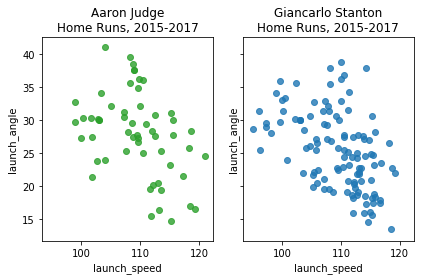

In [206]:
# Create a figure with two scatter plots of launch speed vs. launch angle, one for each player's home runs
jo, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x='launch_speed', y='launch_angle', fit_reg=False, color='tab:green', data=judge_hr, ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.regplot(x='launch_speed', y='launch_angle', fit_reg=False, color='tab:blue', data=stanton_hr, ax=axs1[1]).set_title(
    'Giancarlo Stanton\nHome Runs, 2015-2017');

# plt.gca().get_xaxis().set_visible(False) - use this to get rid of x axis ticks and label


#using fit_reg=True creates a basic OLS regression line 
#you need to have a basic graph aesthetic before you add data - that is why plt.subplots equals
#two variables, and using one as the ax ensures they line up

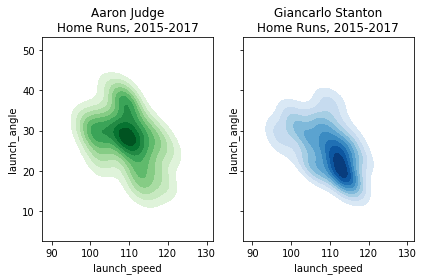

In [166]:
# Create a figure with two KDE plots of launch speed vs. launch angle, one for each player's home runs
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_hr['launch_speed'], judge_hr['launch_angle'], cmap="Greens", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.kdeplot(stanton_hr['launch_speed'], stanton_hr['launch_angle'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title(
    'Giancarlo Stanton\nHome Runs, 2015-2017');

## 5. Home runs by pitch velocity
<p>It appears that Stanton hits his home runs slightly lower and slightly harder than Judge, though this needs to be taken with a grain of salt given the small sample size of home runs.</p>
<p>Not only does Statcast measure the velocity of the ball coming off of the bat, it measures the velocity of the ball coming out of the pitcher's hand and begins its journey towards the plate. We can use this data to compare Stanton and Judge's home runs in terms of pitch velocity. Next you'll find box plots displaying the five-number summaries for each player: minimum, first quartile, median, third quartile, and maximum.</p>

In [168]:
# Combine the Judge and Stanton home run DataFrames for easy boxplot plotting
judge_stanton_hr = pd.concat([judge_hr, stanton_hr])
judge_stanton_hr.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
5589,SL,2015-04-25,81.1,-2.0034,5.6356,Giancarlo Stanton,519317,514669,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,8.0,Giancarlo Stanton homers (5) on a fly ball to ...,R,R,R,MIA,WSH,X,NaN,fly_ball,2,2,2015,0.997250,0.353367,-0.011,1.863,NaN,NaN,NaN,0,8,Bot,75.78,34.52,NaN,NaN,467092.0,NaN,150425_183133,2.422,-118.087,-0.622,11.275,25.373,-30.608,3.77,1.73,415.0,107.9,31.439,78.803,NaN,5.114,413914,514669.0,467092.0,475582.0,457787.0,488862.0,435622.0,150029.0,547180.0,407862.0,55.3827,0.952,1.893,2.0,1.0,0.0,3.0,6.0,61,10
5627,FF,2015-04-23,91.8,-2.3701,5.7473,Giancarlo Stanton,519317,518603,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,13.0,Giancarlo Stanton homers (4) on a line drive t...,R,R,R,PHI,MIA,X,NaN,line_drive,3,2,2015,-1.205758,1.292200,-0.935,2.535,NaN,445988.0,NaN,1,6,Top,40.88,83.02,NaN,NaN,519237.0,NaN,150423_145723,5.900,-133.586,-4.027,-13.695,34.070,-18.600,3.71,1.71,377.0,118.5,13.478,90.825,1937.0,6.250,413880,518603.0,519237.0,573131.0,514917.0,605125.0,433217.0,519184.0,546318.0,425796.0,54.2474,0.814,1.306,2.0,1.0,0.0,3.0,6.0,49,7
5675,FC,2015-04-21,85.5,-2.2315,5.9105,Giancarlo Stanton,519317,425532,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,6.0,Giancarlo Stanton homers (3) on a line drive t...,R,R,R,PHI,MIA,X,NaN,line_drive,3,2,2015,-0.033975,0.503867,0.798,3.013,NaN,NaN,NaN,1,4,Top,173.77,11.51,NaN,NaN,434563.0,NaN,150421_195818,6.589,-124.405,-1.023,1.089,23.180,-28.751,3.77,1.71,449.0,113.1,22.689,84.021,NaN,5.292,413851,425532.0,434563.0,429667.0,400284.0,605125.0,520471.0,519184.0,546318.0,429713.0,55.2061,0.996,1.947,2.0,1.0,0.0,3.0,6.0,25,7
5735,FT,2015-04-17,90.4,-1.4871,5.9198,Giancarlo Stanton,519317,112526,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,6.0,Giancarlo Stanton homers (2) on a line drive t...,R,R,R,NYM,MIA,X,NaN,line_drive,0,2,2015,-1.532800,0.539700,0.503,2.663,NaN,NaN,NaN,2,1,Top,176.31,39.64,NaN,NaN,489232.0,NaN,150417_191502,7.314,-131.500,-1.998,-17.474,30.451,-27.997,3.70,1.68,381.0,103.7,28.498,88.300,2172.0,5.470,413797,112526.0,489232.0,446263.0,502517.0,493472.0,527038.0,150212.0,501571.0,434158.0,55.0300,0.876,1.690,2.0,1.0,0.0,3.0,6.0,3,3
5749,FT,2015-04-16,92.0,-2.1797,5.8636,Giancarlo Stanton,519317,518716,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Giancarlo Stanton homers (1) on a fly ball to ...,R,R,R,NYM,MIA,X,NaN,fly_ball,3,2,2015,-1.440950,0.761867,-0.131,2.800,NaN,592885.0,NaN,1,1,Top,178.86,37.61,NaN,NaN,518595.0,NaN,150416_192005,7.421,-133.877,-2.269,-16.989,30.511,-25.030,3.58,1.58,396.0,104.8,26.092,90.834,2222.0,5.919,413785,518716.0,518595.0,446263.0,502517.0,493472.0,527038.0,150212.0,501571.0,434158.0,54.5816,0.920,1.759,2.0,1.0,0.0,3.0,6.0,3,8


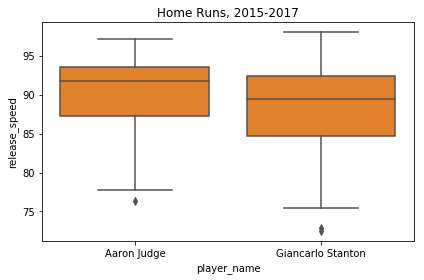

In [212]:
# Create a boxplot that describes the pitch velocity of each player's home runs
sns.boxplot(x='player_name', y='release_speed', data=judge_stanton_hr, color='tab:orange').set_title(
    'Home Runs, 2015-2017');

#tab - indicates default tableau color

## 6. Home runs by pitch location (I)
<p>So Judge appears to hit his home runs off of faster pitches than Stanton. We might call Judge a fastball hitter. Stanton appears agnostic to pitch speed and likely pitch movement since slower pitches (e.g. curveballs, sliders, and changeups) tend to have more break. Statcast <em>does</em> track pitch movement and type but let's move on to something else: <strong>pitch location</strong>. Statcast tracks the zone the pitch is in when it crosses the plate. The zone numbering looks like this (from the catcher's point of view):</p>
<p><img style="margin:5px 20px 5px 1px; width:20%;" src="https://assets.datacamp.com/production/project_250/img/zone.png"></p>
<p>We can plot this using a 2D histogram. For simplicity, let's only look at strikes, which gives us a 9x9 grid. We can view each zone as coordinates on a 2D plot, the bottom left corner being (1,1) and the top right corner being (3,3). Let's set up a function to assign x-coordinates to each pitch.</p>

In [215]:
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row['zone'] in [1, 4, 7]:
        return 1 
        
    # Middle third of strike zone
    if row['zone'] in [2, 5, 8]:
        return 2
    
    # Right third of strike zone
    if row['zone'] in [3, 6, 9]:
        return 3

## 7. Home runs by pitch location (II)
<p>And let's do the same but for y-coordinates.</p>

In [214]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row['zone'] in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row['zone'] in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row['zone'] in [7, 8, 9]:
        return 1

## 8. Aaron Judge's home run zone
<p>Now we can apply the functions we've created then construct our 2D histograms. First, for Aaron Judge (again, for pitches in the strike zone that resulted in home runs).</p>

In [177]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]
judge_strike_hr.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
8,FT,2017-09-30,93.1,-1.4675,5.3552,Aaron Judge,592450,573186,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (52) on a fly ball to left ...,R,R,R,NYY,TOR,X,NaN,fly_ball,2,0,2017,-1.4279,0.3261,-0.4320,2.9955,NaN,NaN,NaN,0,4,Bot,56.86,4.52,NaN,NaN,431145.0,NaN,170930_180303,5.7047,-135.4206,-1.0399,-18.6301,26.9148,-28.1807,3.8271,1.6673,484.0,118.3,25.740,92.992,2312.0,6.040,492513,573186.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.4579,0.983,1.951,2.0,1.0,0.0,3.0,6.0,23,3
50,FF,2017-09-28,91.4,-1.2834,6.5190,Aaron Judge,592450,607188,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Aaron Judge homers (51) on a fly ball to right...,R,R,R,NYY,TB,X,NaN,fly_ball,2,2,2017,-0.4642,1.6500,-0.0851,2.6020,NaN,NaN,NaN,0,1,Bot,223.58,82.88,NaN,NaN,467092.0,NaN,170928_232325,3.9497,-132.6375,-7.3630,-6.2249,28.1393,-11.7031,3.8278,1.6679,357.0,104.1,41.131,90.457,2220.0,5.838,492483,607188.0,467092.0,446263.0,621002.0,446334.0,588751.0,527049.0,488721.0,605480.0,54.6596,0.337,0.640,2.0,1.0,0.0,3.0,5.0,7,5
102,CH,2017-09-25,84.3,-2.1259,6.1178,Aaron Judge,592450,502239,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,7.0,Aaron Judge homers (50) on a fly ball to left ...,R,R,R,NYY,KC,X,NaN,fly_ball,2,1,2017,-1.1677,0.3197,-0.4138,2.3448,NaN,NaN,NaN,2,7,Bot,57.47,39.95,NaN,NaN,521692.0,NaN,170925_192018,6.3096,-122.6568,-3.1191,-13.0269,21.2326,-28.5495,3.8282,1.6684,408.0,109.6,34.853,84.965,1328.0,6.443,490806,502239.0,521692.0,543333.0,593160.0,519058.0,444876.0,466320.0,449181.0,593528.0,54.0549,0.928,1.840,2.0,1.0,0.0,3.0,6.0,57,4
110,FF,2017-09-25,93.0,-2.5921,5.8090,Aaron Judge,592450,596001,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,2.0,Aaron Judge homers (49) on a fly ball to right...,R,R,R,NYY,KC,X,NaN,fly_ball,3,2,2017,-0.8073,1.7389,-0.0837,3.4372,NaN,NaN,458731.0,1,3,Bot,205.50,42.47,NaN,NaN,521692.0,NaN,170925_175250,8.0487,-134.8087,-3.9271,-11.4310,29.8617,-10.7700,3.8273,1.6674,389.0,107.3,31.263,91.784,2117.0,5.805,490806,596001.0,521692.0,543333.0,593160.0,519058.0,444876.0,466320.0,449181.0,593528.0,54.6921,0.935,1.855,2.0,1.0,0.0,3.0,6.0,20,6
125,FT,2017-09-24,93.0,-1.6915,5.2244,Aaron Judge,592450,573186,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,8.0,Aaron Judge hits a home run (47).,R,R,R,TOR,NYY,X,NaN,line_drive,3,2,2017,-0.7011,-0.0597,-0.1824,2.2377,NaN,NaN,NaN,0,6,Top,32.23,68.11,NaN,NaN,431145.0,NaN,170924_191122,5.3529,-135.2444,-1.8215,-9.6144,25.4991,-32.7608,3.8157,1.6547,378.0,113.1,20.531,93.089,2216.0,6.073,492427,573186.0,431145.0,475253.0,446381.0,518626.0,572365.0,606192.0,607680.0,430832.0,54.4290,0.971,1.818,2.0,1.0,0.0,3.0,6.0,51,6


In [216]:
# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)

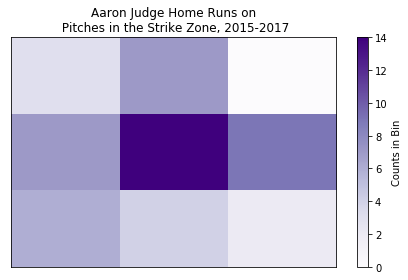

In [217]:
# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(judge_strike_hr['zone_x'], judge_strike_hr['zone_y'], bins = 3, cmap='Purples')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False) #setting false removes ticks 
plt.gca().get_yaxis().set_visible(False) #gca is get current axes - used to tweak current viz.
cb = plt.colorbar() #colorbar is key with gradation
cb.set_label('Counts in Bin') #labeling the colorbar 

## 9. Giancarlo Stanton's home run zone
<p>And now for Giancarlo Stanton.</p>

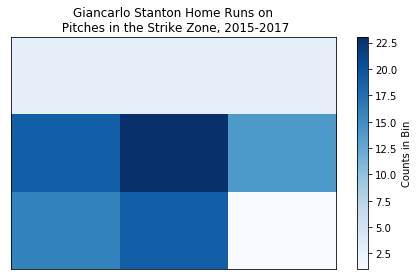

In [218]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
stanton_strike_hr = stanton_hr.copy().loc[stanton_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Stanton home runs

stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis=1)

# Plot Stanton's home run zone as a 2D histogram with a colorbar

plt.hist2d(stanton_strike_hr['zone_x'] ,stanton_strike_hr['zone_y'], bins=3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

## 10. Should opposing pitchers be scared?
<p>A few takeaways:</p>
<ul>
<li>Stanton does not hit many home runs on pitches in the upper third of the strike zone.</li>
<li>Like pretty much every hitter ever, both players love pitches in the horizontal and vertical middle of the plate.</li>
<li>Judge's least favorite home run pitch appears to be high-away while Stanton's appears to be low-away.</li>
<li>If we were to describe Stanton's home run zone, it'd be middle-inside. Judge's home run zone is much more spread out.</li>
</ul>
<p>The grand takeaway from this whole exercise: Aaron Judge and Giancarlo Stanton are not identical despite their superficial similarities. In terms of home runs, their launch profiles, as well as their pitch speed and location preferences, are different.</p>
<p>Should opposing pitchers still be scared?</p>

In [219]:
# Should opposing pitchers be wary of Aaron Judge and Giancarlo Stanton
should_pitchers_be_scared = True